## 1. Import Statements

In [1]:
#data analysis libraries
import pandas as pd
import numpy as np
import sklearn as sk

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Read and Explore

In [2]:
#import train and test CSV files
train_data=pd.read_csv("../resources/titanic-ml/train.csv",low_memory=False)
test_data=pd.read_csv("../resources/titanic-ml/test.csv",low_memory=False)

train_data.shape, test_data.shape

((891, 12), (418, 11))

In [3]:
#train data sample
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#test data sample
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#summary of train_data dataset
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#test data exploration
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 3. Data Analysis (EDA) 

In [7]:
#summary of train_data dataset
train_data.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Taussig, Mrs. Emil (Tillie Mandelbaum)",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
#checking null values in train_data dataset
print(pd.isnull(train_data).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
#summary of train_data dataset
test_data.describe(include = "all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Olsen, Master. Artur Karl",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [10]:
#checking null values in train_data dataset
print(pd.isnull(test_data).sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## 4. Feature Extraction

### Sex Ratio

Percentage of females survived: 74.20382165605095
Percentage of males survived: 18.890814558058924


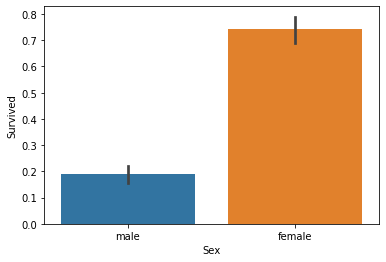

In [11]:
sns.barplot(x="Sex", y="Survived", data=train_data)

print("Percentage of females survived:", train_data["Survived"][train_data["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males survived:", train_data["Survived"][train_data["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

### Pclass Ratio

Percentage of 1 survived: 62.96296296296296
Percentage of 2 survived: 47.28260869565217
Percentage of 3 survived: 24.236252545824847


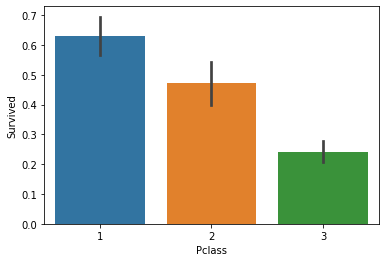

In [12]:
sns.barplot(x="Pclass", y="Survived", data=train_data)

print("Percentage of 1 survived:", train_data["Survived"][train_data["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of 2 survived:", train_data["Survived"][train_data["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of 3 survived:", train_data["Survived"][train_data["Pclass"] == 3].value_counts(normalize = True)[1]*100)

### Age Ratio

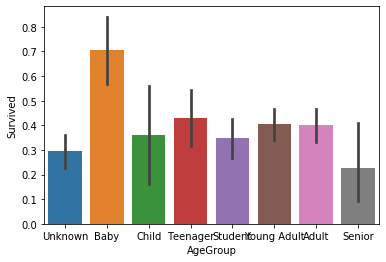

In [13]:
#sort the ages into logical categories
train_data["Age"] = train_data["Age"].fillna(-0.5)
test_data["Age"] = test_data["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train_data['AgeGroup'] = pd.cut(train_data["Age"], bins, labels = labels)
test_data['AgeGroup'] = pd.cut(test_data["Age"], bins, labels = labels)


sns.barplot(x="AgeGroup", y="Survived", data=train_data)
plt.show()

### Cabin as Boolean Ratio

Percentage of Cabin as 1: 66.66666666666666
Percentage of Cabin as 0: 29.985443959243085


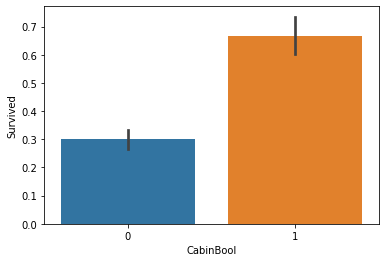

In [14]:
train_data["CabinBool"] = (train_data["Cabin"].notnull().astype('int'))
test_data["CabinBool"] = (test_data["Cabin"].notnull().astype('int'))

print("Percentage of Cabin as 1:", train_data["Survived"][train_data["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Cabin as 0:", train_data["Survived"][train_data["CabinBool"] == 0].value_counts(normalize = True)[1]*100)

sns.barplot(x="CabinBool", y="Survived", data=train_data)
plt.show()

###  Sibsp Ratio

Percentage of SibSp as 0: 34.53947368421053
Percentage of SibSp as 1: 53.588516746411486
Percentage of SibSp as 2: 46.42857142857143


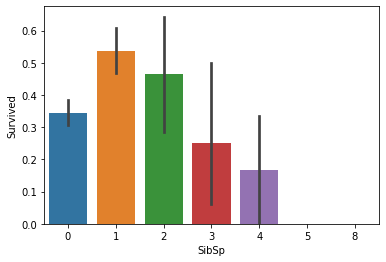

In [15]:
sns.barplot(x="SibSp", y="Survived", data=train_data)

print("Percentage of SibSp as 0:", train_data["Survived"][train_data["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp as 1:", train_data["Survived"][train_data["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp as 2:", train_data["Survived"][train_data["SibSp"] == 2].value_counts(normalize = True)[1]*100)

### Parch Ratio

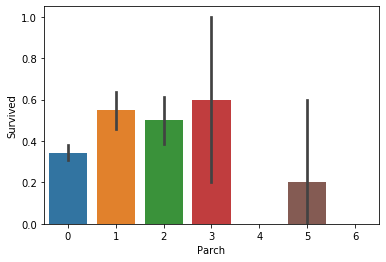

In [16]:
sns.barplot(x="Parch", y="Survived", data=train_data)
plt.show()

## 5. Data Cleaning

In [17]:
test_data.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Olsen, Master. Artur Karl",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


In [18]:
# For Cabin Feature

train_data = train_data.drop(['Cabin'], axis = 1)
test_data = test_data.drop(['Cabin'], axis = 1)

In [19]:
# For Ticket Feature

train_data = train_data.drop(['Ticket'], axis = 1)
test_data = test_data.drop(['Ticket'], axis = 1)

In [20]:
# For Embarked Feature

print("Number of people embarking in Southampton (S):",train_data[train_data["Embarked"] == "S"].shape[0])
print("Number of people embarking in Cherbourg (C):",train_data[train_data["Embarked"] == "C"].shape[0])
print("Number of people embarking in Queenstown (Q):",train_data[train_data["Embarked"] == "Q"].shape[0])


#replacing the missing values in the Embarked feature with S since it occurs most
train_data = train_data.fillna({"Embarked": "S"})

Number of people embarking in Southampton (S): 644
Number of people embarking in Cherbourg (C): 168
Number of people embarking in Queenstown (Q): 77


In [21]:
# For Age Feature

combine = [train_data, test_data]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_data.head()

# fill missing age by same technique

mr_age = train_data[train_data["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train_data[train_data["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train_data[train_data["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train_data[train_data["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train_data[train_data["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train_data[train_data["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train_data["AgeGroup"])):
    if train_data["AgeGroup"][x] == "Unknown":
        train_data["AgeGroup"][x] = age_title_mapping[train_data["Title"][x]]
        
for x in range(len(test_data["AgeGroup"])):
    if test_data["AgeGroup"][x] == "Unknown":
        test_data["AgeGroup"][x] = age_title_mapping[test_data["Title"][x]]
        
#map each Age value to a numerical value

age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train_data['AgeGroup'] = train_data['AgeGroup'].map(age_mapping)
test_data['AgeGroup'] = test_data['AgeGroup'].map(age_mapping)

train_data.head()

#dropping the Age feature for now, might change
train_data = train_data.drop(['Age'], axis = 1)
test_data = test_data.drop(['Age'], axis = 1)

In [22]:
# For Name Feature

train_data = train_data.drop(['Name'], axis = 1)
test_data = test_data.drop(['Name'], axis = 1)

In [23]:
# For Sex Feature

sex_mapping = {"male": 0, "female": 1}
train_data['Sex'] = train_data['Sex'].map(sex_mapping)
test_data['Sex'] = test_data['Sex'].map(sex_mapping)

train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4,0,1
1,2,1,1,1,1,0,71.2833,C,6,1,3
2,3,1,3,1,0,0,7.9250,S,5,0,2
3,4,1,1,1,1,0,53.1000,S,5,1,3
4,5,0,3,0,0,0,8.0500,S,5,0,1


In [24]:
# For Embarked Feature

embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_data['Embarked'] = train_data['Embarked'].map(embarked_mapping)
test_data['Embarked'] = test_data['Embarked'].map(embarked_mapping)

train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4,0,1
1,2,1,1,1,1,0,71.2833,2,6,1,3
2,3,1,3,1,0,0,7.9250,1,5,0,2
3,4,1,1,1,1,0,53.1000,1,5,1,3
4,5,0,3,0,0,0,8.0500,1,5,0,1


In [25]:
# For Fare Feature

#fill in missing Fare value in test_data set based on mean fare for that Pclass 

for x in range(len(test_data["Fare"])):
    if pd.isnull(test_data["Fare"][x]):
        pclass = test_data["Pclass"][x] #Pclass = 3
        test_data["Fare"][x] = round(train_data[train_data["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values

train_data['FareBand'] = pd.qcut(train_data['Fare'], 4, labels = [1, 2, 3, 4])
test_data['FareBand'] = pd.qcut(test_data['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values

train_data = train_data.drop(['Fare'], axis = 1)
test_data = test_data.drop(['Fare'], axis = 1)

In [26]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4,0,1,1
1,2,1,1,1,1,0,2,6,1,3,4
2,3,1,3,1,0,0,1,5,0,2,2
3,4,1,1,1,1,0,1,5,1,3,4
4,5,0,3,0,0,0,1,5,0,1,2


In [27]:
test_data.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5,0,1,1
1,893,3,1,1,0,1,6,0,3,1
2,894,2,0,0,0,3,7,0,1,2
3,895,3,0,0,0,1,5,0,1,2
4,896,3,1,1,1,1,4,0,3,2


## 6 Data Modelling 

In [28]:
# We will use part of our training data (22% in this case) to test the accuracy of our different models

from sklearn.model_selection import train_test_split

predictors = train_data.drop(['Survived', 'PassengerId'], axis=1)
target = train_data["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [29]:
# Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.68


In [30]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

79.19


In [31]:
# Support Vector Machines

from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

82.74


In [32]:
# Linear SVC

from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

78.17


In [33]:
# Perceptron

from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

78.68


In [34]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

80.71


In [35]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

81.73


In [36]:
# KNN or k-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

77.66


In [37]:
# Stochastic Gradient Descent

from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

71.57


In [38]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

84.77


In [39]:
# Comparing the results

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,Gradient Boosting Classifier,84.77
0,Support Vector Machines,82.74
3,Random Forest,81.73
7,Decision Tree,80.71
2,Logistic Regression,79.19
4,Naive Bayes,78.68
5,Perceptron,78.68
6,Linear SVC,78.17
1,KNN,77.66
8,Stochastic Gradient Descent,71.57


In [40]:
ids = test_data['PassengerId']
predictions = gbk.predict(test_data.drop('PassengerId', axis=1))

## 7 Exporting Data 

In [41]:
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('../resources/submission.csv', index=False)